In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv('movie_metadata.csv')
del df['director_facebook_likes']
del df['num_critic_for_reviews']
del df['actor_1_facebook_likes']
del df['actor_2_facebook_likes']
del df['actor_3_facebook_likes']
del df['num_user_for_reviews']
del df['num_voted_users']
del df['movie_facebook_likes']
del df['movie_imdb_link']
del df['cast_total_facebook_likes']
del df['plot_keywords']
clean_data= df[df['director_name'].notnull() & df['facenumber_in_poster'].notnull()& df['color'].notnull() & df['duration'].notnull() & df['actor_2_name'].notnull() & df['genres'].notnull()
               & df['actor_1_name'].notnull() & df['actor_3_name'].notnull() & df['country'].notnull()
               & df['title_year'].notnull() & df['budget'].notnull() & df['gross'].notnull() & df['aspect_ratio'].notnull() & df['language'].notnull() & df['content_rating'].notnull()]
df=clean_data

In [5]:
usa=df['country']=='USA'
df=df[usa]

In [6]:
df = df.dropna(how='any',axis=0)

In [7]:
df['director_avg_gross']=0.0
df['director_avg_score']=0.0
df['director_movies']=0

In [8]:
import math

for index,row in df.iterrows():
    director=row['director_name']
    time=row['title_year']
    a=df['director_name']==director
    b=df['title_year']<time
    
    c=df[a & b]['gross'].aggregate(np.mean)
    d=df[a & b]['imdb_score'].aggregate(np.mean)
    e=df[a & b].shape[0]
    if math.isnan(c):
        c=0
    if math.isnan(d):
        d=0
    if math.isnan(e):
        e=0
    df.at[index,'director_avg_gross']=c
    df.at[index,'director_avg_score']=d
    df.at[index,'director_movies']=e

In [9]:
import pandas as pd
import numpy as np
import math

df['actor_average_score']=0.0
for index,row in df.iterrows():
    actor1=row['actor_1_name']
    time=row['title_year']
    a=df['actor_1_name']==actor1
    b=df['actor_2_name']==actor1
    c=df['actor_3_name']==actor1
    d=df['title_year']<time
    x=df[a & d]['imdb_score'].aggregate(np.mean)
    y=df[b & d]['imdb_score'].aggregate(np.mean)
    z=df[c & d]['imdb_score'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    e=(x+y+z)/3
    if math.isnan(e):
        e=0
    actor2=row['actor_2_name']
    a=df['actor_1_name']==actor2
    b=df['actor_2_name']==actor2
    c=df['actor_3_name']==actor2
    x=df[a & d]['imdb_score'].aggregate(np.mean)
    y=df[b & d]['imdb_score'].aggregate(np.mean)
    z=df[c & d]['imdb_score'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    f=(x+y+z)/3
    if math.isnan(f):
        f=0
    actor3=row['actor_3_name']
    a=df['actor_1_name']==actor3
    b=df['actor_2_name']==actor3
    c=df['actor_3_name']==actor3
    x=df[a & d]['imdb_score'].aggregate(np.mean)
    y=df[b & d]['imdb_score'].aggregate(np.mean)
    z=df[c & d]['imdb_score'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    g=(x+y+z)/3
    if math.isnan(g):
        g=0
    h=(e+f+g)/3
    
    if math.isnan(h):
        h=0
    df.at[index,'actor_average_score']=h

In [10]:
df['actor_average_gross']=0.0
for index,row in df.iterrows():
    actor1=row['actor_1_name']
    time=row['title_year']
    a=df['actor_1_name']==actor1
    b=df['actor_2_name']==actor1
    c=df['actor_3_name']==actor1
    d=df['title_year']<time
    x=df[a & d]['gross'].aggregate(np.mean)
    y=df[b & d]['gross'].aggregate(np.mean)
    z=df[c & d]['gross'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    e=(x+y+z)/3
    if math.isnan(e):
        e=0
    actor2=row['actor_2_name']
    a=df['actor_1_name']==actor2
    b=df['actor_2_name']==actor2
    c=df['actor_3_name']==actor2
    x=df[a & d]['gross'].aggregate(np.mean)
    y=df[b & d]['gross'].aggregate(np.mean)
    z=df[c & d]['gross'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    f=(x+y+z)/3
    if math.isnan(f):
        f=0
    actor3=row['actor_3_name']
    a=df['actor_1_name']==actor3
    b=df['actor_2_name']==actor3
    c=df['actor_3_name']==actor3
    x=df[a & d]['gross'].aggregate(np.mean)
    y=df[b & d]['gross'].aggregate(np.mean)
    z=df[c & d]['gross'].aggregate(np.mean)
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0
    g=(x+y+z)/3
    if math.isnan(g):
        g=0
    h=(e+f+g)/3
    
    if math.isnan(h):
        h=0
    df.at[index,'actor_average_gross']=h

In [11]:
df['actor_movies']=0
for index,row in df.iterrows():
    actor1=row['actor_1_name']
    time=row['title_year']
    a=df['actor_1_name']==actor1
    b=df['actor_2_name']==actor1
    c=df['actor_3_name']==actor1
    d=df['title_year']<time
    x=df[a & d].shape[0]
    y=df[b & d].shape[0]
    z=df[c & d].shape[0]
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0    
    e=x+y+z
    if math.isnan(e):
        e=0
    actor2=row['actor_2_name']
    a=df['actor_1_name']==actor2
    b=df['actor_2_name']==actor2
    c=df['actor_3_name']==actor2
    x=df[a & d].shape[0]
    y=df[b & d].shape[0]
    z=df[c & d].shape[0]
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0    
    f=x+y+z    
    if math.isnan(f):
        f=0
    actor3=row['actor_3_name']
    a=df['actor_1_name']==actor3
    b=df['actor_2_name']==actor3
    c=df['actor_3_name']==actor3
    x=df[a & d].shape[0]
    y=df[b & d].shape[0]
    z=df[c & d].shape[0]
    if math.isnan(x):
        x=0
    if math.isnan(y):
        y=0
    if math.isnan(z):
        z=0    
    g=x+y+z    
    if math.isnan(g):
        g=0
    h=(e+f+g)
    
    if math.isnan(h):
        h=0
    df.at[index,'actor_movies']=h

In [12]:
df.to_csv('Stage2Final.csv')

In [13]:
df=pd.read_csv('Stage2Final.csv',index_col=0)

In [14]:
df.isna().sum()

color                   0
director_name           0
duration                0
actor_2_name            0
gross                   0
genres                  0
actor_1_name            0
movie_title             0
actor_3_name            0
facenumber_in_poster    0
language                0
country                 0
content_rating          0
budget                  0
title_year              0
imdb_score              0
aspect_ratio            0
director_avg_gross      0
director_avg_score      0
director_movies         0
actor_average_score     0
actor_average_gross     0
actor_movies            0
dtype: int64

In [15]:
df['gross_class']=1
for index,row in df.iterrows():
    gross=row['gross']
    gross_class=1
    if gross>=1000000.0 and gross<10000000.0:
            gross_class=2
    if gross>=10000000.0 and gross<20000000.0:
            gross_class=3
    if gross>=20000000.0 and gross<40000000.0:
            gross_class=4
    if gross>=40000000.0 and gross<65000000.0:
            gross_class=5
    if gross>=65000000.0 and gross<100000000.0:
            gross_class=6
    if gross>=100000000.0 and gross<150000000.0:
            gross_class=7
    if gross>=150000000.0 and gross<200000000.0:
            gross_class=8
    if gross>=200000000.0:
            gross_class=9
    df.at[index,'gross_class']=gross_class

In [16]:

del df['country']
del df['director_name']
del df['movie_title']
del df['actor_1_name']
del df['actor_2_name']
del df['actor_3_name']

In [17]:
df.to_csv('WithGrossFinal.csv')

In [18]:
del df['gross']

In [19]:
df.to_csv('WithoutGrossFinal.csv')

In [20]:
import pandas as pd

In [21]:
df=pd.read_csv('WithoutGrossFinal.csv',index_col=0)

In [22]:
fd=pd.read_csv('Stage2Final.csv',index_col=0)

In [23]:
df.isna().sum()

color                   0
duration                0
genres                  0
facenumber_in_poster    0
language                0
content_rating          0
budget                  0
title_year              0
imdb_score              0
aspect_ratio            0
director_avg_gross      0
director_avg_score      0
director_movies         0
actor_average_score     0
actor_average_gross     0
actor_movies            0
gross_class             0
dtype: int64

In [24]:
from __future__ import print_function

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, pipeline
#import category_encoders as ce


from sklearn import preprocessing
from collections import defaultdict
fd=pd.read_csv('WithoutGrossFinal.csv',index_col=0)

In [25]:
s=fd['genres']
genre_num=pd.DataFrame()
k=0
for i in s:
    l=i.split('|')
    
    for j in l:
        genre_num.at[k,j]=1
    k=k+1

In [26]:
genre_num=genre_num.fillna('0')

In [27]:
del fd['genres']

In [28]:
fd=fd.reset_index(drop=True)


In [29]:
x_list_encode=fd.select_dtypes(include=['object']).copy()

In [30]:
endcode_data=pd.get_dummies(x_list_encode)

In [31]:
fd=fd.join(endcode_data)

In [32]:
fd=fd.join(genre_num)

In [33]:
del fd['color']
del fd['language']
del fd['content_rating']

In [34]:
y=fd.gross_class
X=fd.drop('gross_class',axis=1)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [36]:
n_folds = 5

from sklearn.model_selection import KFold


# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(n_splits=n_folds, random_state=1)
kf = kf.get_n_splits(X_train)

C:\Users\HRITHIK\Anaconda4\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Training Random Forest...
The classifier accuracy score is 0.60
The 5-fold cross-validation accuracy score for this classifier is 0.52


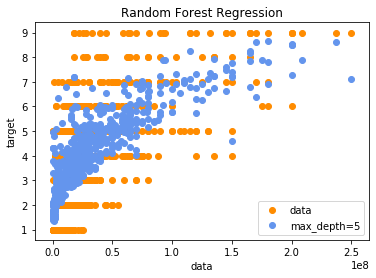

In [37]:
print ('Training Random Forest...')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


clf_rf = RandomForestRegressor(n_estimators=1000,max_depth=10) 
clf_rf = clf_rf.fit( X_train, y_train )
classifier_score = clf_rf.score(X_test, y_test)
print ('The classifier accuracy score is {:.2f}'.format(classifier_score))
# Get average of 3-fold cross-validation score 
score = cross_val_score(clf_rf, X_test, y_test, cv=kf)
print ('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, score.mean()))

x_1=X_test['budget']

y_1 = clf_rf.predict(X_test)

plt.figure()
plt.scatter(x_1, y_test, c="darkorange", label="data")
plt.scatter(x_1, y_1, color="cornflowerblue", label="max_depth=5")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
# -*- coding: utf-8 -*-
from __future__ import print_function

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model, pipeline
#import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from collections import defaultdict
import graphviz 
from sklearn import tree
import matplotlib.pyplot as plt



#import category_encoders as ce



import math
df=pd.read_csv('Stage2Lower.csv',index_col=0)
tf=pd.read_csv('WithoutGrossLower.csv',index_col=0)
print("******************Welcome to Movie Success Predictor*******************")

actor1=input('Enter Actor 1 Name: ')
actor2=input('Enter Actor 2 Name: ')
actor3=input('Enter Actor 3 Name: ')
director=input('Enter Director Name: ')
time=int(input('Enter movie year: '))
budget=int(input('Enter movie budget in million US dollars: '))
budget=budget*1000000
faceno=int(input('Enter face number in poster: '))
duration=int(input('Enter duration of movie in minutes: '))
color=input('Enter color of movie(Color/Black and White): ')
c_rating=input('Enter content rating(PG-13/PG/G/R/Approved/X/Not Rated/M/Unrated/Passed/NC-17): ')
genres=input('Enter genre of movie(Seperate genres with \'|\' between different genres): ')
language=input('Enter language of movie: ')
score=float(input('Enter imdb score: '))
aspect_ratio=float(input('Enter Aspect Ratio: '))
actor1=actor1.lower()
actor2=actor2.lower()
actor3=actor3.lower()
director=director.lower()
color=color.lower()
c_rating=c_rating.lower()
genres=genres.lower()
language=language.lower()



#Director Average gross, score and total movies
a=df['director_name']==director
b=df['title_year']<time
    
c=df[a & b]['gross'].aggregate(np.mean)
d=df[a & b]['imdb_score'].aggregate(np.mean)
e=df[a & b].shape[0]
if math.isnan(c):
    c=0
if math.isnan(d):
    d=0
if math.isnan(e):
    e=0
director_avg_gross=c
director_avg_score=d
director_movies=e



#Average IMDB score of actors according to their previous movies
a=df['actor_1_name']==actor1
b=df['actor_2_name']==actor1
c=df['actor_3_name']==actor1
d=df['title_year']<time
x=df[a & d]['imdb_score'].aggregate(np.mean)
y=df[b & d]['imdb_score'].aggregate(np.mean)
z=df[c & d]['imdb_score'].aggregate(np.mean)
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0
e=(x+y+z)/3
if math.isnan(e):
    e=0

a=df['actor_1_name']==actor2
b=df['actor_2_name']==actor2
c=df['actor_3_name']==actor2
x=df[a & d]['imdb_score'].aggregate(np.mean)
y=df[b & d]['imdb_score'].aggregate(np.mean)
z=df[c & d]['imdb_score'].aggregate(np.mean)
if math.isnan(x):
    
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0
f=(x+y+z)/3
if math.isnan(f):
    f=0

a=df['actor_1_name']==actor3
b=df['actor_2_name']==actor3
c=df['actor_3_name']==actor3
x=df[a & d]['imdb_score'].aggregate(np.mean)
y=df[b & d]['imdb_score'].aggregate(np.mean)
z=df[c & d]['imdb_score'].aggregate(np.mean)
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0
g=(x+y+z)/3
if math.isnan(g):
    g=0
h=(e+f+g)/3
    
if math.isnan(h):
    h=0
actor_avg_score=h   



#Average gross of actors according to their previous movies
a=df['actor_1_name']==actor1    
b=df['actor_2_name']==actor1
c=df['actor_3_name']==actor1
d=df['title_year']<time
x=df[a & d]['gross'].aggregate(np.mean)
y=df[b & d]['gross'].aggregate(np.mean)
z=df[c & d]['gross'].aggregate(np.mean)
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0
e=(x+y+z)/3
if math.isnan(e):
    e=0

a=df['actor_1_name']==actor2
b=df['actor_2_name']==actor2
c=df['actor_3_name']==actor2
x=df[a & d]['gross'].aggregate(np.mean)
y=df[b & d]['gross'].aggregate(np.mean)
z=df[c & d]['gross'].aggregate(np.mean)
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0
f=(x+y+z)/3
if math.isnan(f):
    f=0

a=df['actor_1_name']==actor3
b=df['actor_2_name']==actor3
c=df['actor_3_name']==actor3
x=df[a & d]['gross'].aggregate(np.mean)
y=df[b & d]['gross'].aggregate(np.mean)
z=df[c & d]['gross'].aggregate(np.mean)
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0
g=(x+y+z)/3
if math.isnan(g):
    g=0
h=(e+f+g)/3

if math.isnan(h):
    h=0
actor_avg_gross=h


#Total movies of actors according to their previous movies
a=df['actor_1_name']==actor1
b=df['actor_2_name']==actor1
c=df['actor_3_name']==actor1
d=df['title_year']<time
x=df[a & d].shape[0]
y=df[b & d].shape[0]
z=df[c & d].shape[0]
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0    
e=x+y+z
if math.isnan(e):
    e=0

a=df['actor_1_name']==actor2
b=df['actor_2_name']==actor2
c=df['actor_3_name']==actor2
x=df[a & d].shape[0]
y=df[b & d].shape[0]
z=df[c & d].shape[0]
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0    
f=x+y+z    
if math.isnan(f):
    f=0

a=df['actor_1_name']==actor3
b=df['actor_2_name']==actor3
c=df['actor_3_name']==actor3
x=df[a & d].shape[0]
y=df[b & d].shape[0]
z=df[c & d].shape[0]
if math.isnan(x):
    x=0
if math.isnan(y):
    y=0
if math.isnan(z):
    z=0    
g=x+y+z    
if math.isnan(g):
    g=0
h=(e+f+g)

if math.isnan(h):
    h=0
actor_movies=h

print("Encoding Data....")
ft=tf.copy()
ft=ft.append({'color':color,'duration':duration,'genres':genres,'facenumber_in_poster':faceno,'language':language,'content_rating':c_rating,'budget':budget,'title_year':time,'imdb_score':score,'aspect_ratio':aspect_ratio,'director_avg_gross':director_avg_gross,'director_movies':director_movies,'director_avg_score':director_avg_score,'actor_average_score':actor_avg_score,'actor_average_gross':actor_avg_gross,'actor_movies':actor_movies},ignore_index=True)
le = defaultdict(preprocessing.LabelEncoder) 
s=ft['genres']
del ft['genres']
genre_num=pd.DataFrame()
k=0
for i in s:
    l=i.split('|')
    
    for j in l:
        genre_num.at[k,j]=1
    k=k+1
genre_num=genre_num.fillna('0')
x_list_encode=ft.select_dtypes(include=['object']).copy()
endcode_data=pd.DataFrame()
endcode_data=pd.get_dummies(x_list_encode)
del ft['color']
del ft['language']
del ft['content_rating']
ft=ft.join(endcode_data)
ft=ft.reset_index(drop=True)
ft=ft.join(genre_num)
print("Data Encoding Complete")
print("Applying Algorithm and predicting results.....")


Pre=pd.DataFrame()
Pre=Pre.append(ft[len(ft)-1:],ignore_index=True)
ft=ft.drop(ft.index[len(ft)-1])
y=ft.gross_class
X=ft.drop('gross_class',axis=1)
X.isna().sum()
Pre=Pre.drop('gross_class',axis=1)
clf_rf = RandomForestRegressor(n_estimators=1000,max_depth=10) 
clf_rf = clf_rf.fit( X, y )
y_1 = clf_rf.predict(Pre)
clf_rf = tree.DecisionTreeClassifier()
tree.plot_tree(clf_rf.fit(X,y))

dot_data = tree.export_graphviz(clf_rf, out_file=None)
# dot_data = tree.export_graphviz(clf_rf, out_file=None,feature_names=X,class_names=y,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("Movie Success Prediction")


GROSS_CLASS=y_1[0]
gross=""
if GROSS_CLASS<=1:
    gross="Upto 1 Million Dollars"
if GROSS_CLASS>1  and GROSS_CLASS<=2:
    gross="1 to 10 Million Dollars"
if GROSS_CLASS>2 and GROSS_CLASS<=3:
    gross="10 to 20 Million Dollars"
if GROSS_CLASS>3 and GROSS_CLASS<=4:
    gross="20 to 40 Million Dollars"
if GROSS_CLASS>4 and GROSS_CLASS<=5:
    gross="40 to 65 Million Dollars"
if GROSS_CLASS>5 and GROSS_CLASS<=6:
    gross="65 to 100  Million Dollars"
if GROSS_CLASS>6 and GROSS_CLASS<=7:
    gross="100 to 150 Million Dollars"
if GROSS_CLASS>7 and GROSS_CLASS<=8:
    gross="150 to 200 Million Dollars"
if GROSS_CLASS>8 and GROSS_CLASS<=9:
    gross="200+ Million Dollars"
print("The predicted approximate gross revenue of the movie is:")
print(gross)

******************Welcome to Movie Success Predictor*******************


In [ ]:
!pip install graphviz